In [ ]:
import pandas as pd
import math as m
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics

In [ ]:
# https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education
df = pd.read_csv('students_adaptability_level_online_education.csv')
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


Preparação dos dados do dataframe

In [ ]:
lentotal = len(df)

df['Gender'] = df['Gender'].replace({'Girl': 0, 'Boy': 1})
df['Age'] = df['Age'].replace({'1-5': 0, '6-10': 1, '11-15': 2, '16-20': 3, '21-25': 4, '26-30': 5})
df['Education Level'] = df['Education Level'].replace({'School': 0, 'College': 1, 'University': 2})
df['Institution Type'] = df['Institution Type'].replace({'Non Government': 0, 'Government': 1})
df['IT Student'] = df['IT Student'].replace({'No': 0, 'Yes': 1})
df['Location'] = df['Location'].replace({'No': 0, 'Yes': 1})
df['Load-shedding'] = df['Load-shedding'].replace({'Low': 0, 'High': 1})
df['Financial Condition'] = df['Financial Condition'].replace({'Poor': 0, 'Mid': 1, 'Rich': 2})
df['Internet Type'] = df['Internet Type'].replace({'Wifi': 0, 'Mobile Data': 1})
df['Network Type'] = df['Network Type'].replace({'2G': 0, '3G': 1, '4G': 2})
df['Class Duration'] = df['Class Duration'].replace({'0': 0, '1-3': 1, '3-6': 2})
df['Internet Type'] = df['Internet Type'].replace({'Wifi': 0, 'Mobile Data': 1})
df['Self Lms'] = df['Self Lms'].replace({'No': 0, 'Yes': 1})
df['Device'] = df['Device'].replace({'Tab': 0, 'Mobile': 1, 'Computer': 2})
df['Adaptivity Level'] = df['Adaptivity Level'].replace({'Low': 0, 'Moderate': 1, 'High': 1})

df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,1,4,2,0,0,1,0,1,0,2,2,0,0,1
1,0,4,2,0,0,1,1,1,1,2,1,1,1,1
2,0,3,1,1,0,1,0,1,0,2,1,0,1,1
3,0,2,0,0,0,1,0,1,1,2,1,0,1,1
4,0,3,0,0,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0,3,1,0,0,1,0,1,0,2,1,0,1,0
1201,0,3,1,0,0,0,1,1,0,2,2,0,1,1
1202,1,2,0,0,0,1,0,1,1,1,1,0,1,1
1203,0,3,1,0,0,0,0,1,0,2,1,0,1,0


Cálculo da entropia utilizando o target (Adaptivity Level)

In [ ]:
lentotal = len(df)
noAdap = len(df[df['Adaptivity Level'] == 0])
Adap = len(df[df['Adaptivity Level'] == 1])
entropy = -(noAdap/lentotal)*m.log2(noAdap/lentotal)-(Adap/lentotal)*m.log2(Adap/lentotal)

print(entropy)

0.9699714187137936


Criação e separação dos dados

In [ ]:
# dados
X0 = df['Gender'].to_numpy()
X1 = df['Age'].to_numpy()
X2 = df['Education Level'].to_numpy()
X3 = df['Institution Type'].to_numpy()
X4 = df['IT Student'].to_numpy()
X5 = df['Location'].to_numpy()
X6 = df['Load-shedding'].to_numpy()
X7 = df['Financial Condition'].to_numpy()
X8 = df['Internet Type'].to_numpy()
X9 = df['Network Type'].to_numpy()
X10 = df['Class Duration'].to_numpy()
X11 = df['Self Lms'].to_numpy()
X12 = df['Device'].to_numpy()
X = np.c_[X0, X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12]

# target
y = df['Adaptivity Level'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Utilização do GridSearch para encontrar os melhores parâmetros para DecisionTreeClassifier

In [ ]:
params = {'max_depth': [3, 4, 6, 8, 10], 'min_samples_split': [2, 3, 4]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


DecisionTreeClassifier(max_depth=10, random_state=42)

Treino e teste utilizando DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=3, random_state=42, splitter='best')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Dados do treino:")
print(classification_report(clf.predict(X_train),y_train))
print("Dados do teste:")
print(classification_report(clf.predict(X_test),y_test))
print("Acuracidade: ", str(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: ", str(metrics.precision_score(y_test, y_pred, average='weighted')))


Dados do treino:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       385
           1       0.93      0.94      0.93       579

    accuracy                           0.92       964
   macro avg       0.91      0.91      0.91       964
weighted avg       0.92      0.92      0.92       964

Dados do teste:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       102
           1       0.91      0.90      0.90       139

    accuracy                           0.89       241
   macro avg       0.88      0.89      0.89       241
weighted avg       0.89      0.89      0.89       241

Acuracidade:  0.8879668049792531
Precisão:  0.8878558856600343


Criação do gráfico completo da árvore DecisionTreeClassifier

In [ ]:
plt.figure(figsize=(80, 50))
tree.plot_tree(clf, fontsize=12, feature_names=['Gender', 'Age',	'Education Level',	'Institution Type',	'IT Student',	
                                 'Location',	'Load-shedding',	'Financial Condition',	'Internet Type',	
                                 'Network Type',	'Class Duration',	'Self Lms',	'Device'], rounded=True, filled=True)
plt.show()

Árvore resumida

In [ ]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, fontsize=9, feature_names=['Gender', 'Age',	'Education Level',	'Institution Type',	'IT Student',	
                                 'Location',	'Load-shedding',	'Financial Condition',	'Internet Type',	
                                 'Network Type',	'Class Duration',	'Self Lms',	'Device'], rounded=True, filled=True, max_depth=3)
plt.show()

Buscando os melhores parâmetros para o classificador Random Forest

In [ ]:
param_grid = {
    "max_depth": [4, 5, 6, 8],
    "max_features": ["auto", "sqrt"],
    "n_estimators": [20, 50, 100]
}

cf = RandomForestClassifier()
cf_cv = GridSearchCV(estimator=cf, param_grid=param_grid, cv=3)
cf_cv.fit(X_train, y_train)

cf_cv.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 50}

Utilizando o classificador Random Forest

In [ ]:
# criação e treino do randomforest
rf = RandomForestClassifier(n_estimators=100, max_depth=8, max_features='sqrt').fit(X_train,y_train)

print("Dados do treino:")
print(classification_report(rf.predict(X_train),y_train))
print("Dados do teste:")
print(classification_report(rf.predict(X_test),y_test))

Dados do treino:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       321
           1       0.96      0.88      0.92       643

    accuracy                           0.89       964
   macro avg       0.88      0.90      0.89       964
weighted avg       0.90      0.89      0.90       964

Dados do teste:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        83
           1       0.97      0.85      0.91       158

    accuracy                           0.88       241
   macro avg       0.87      0.90      0.88       241
weighted avg       0.90      0.88      0.89       241



Criação do gráfico da árvore RandomForestClassifier

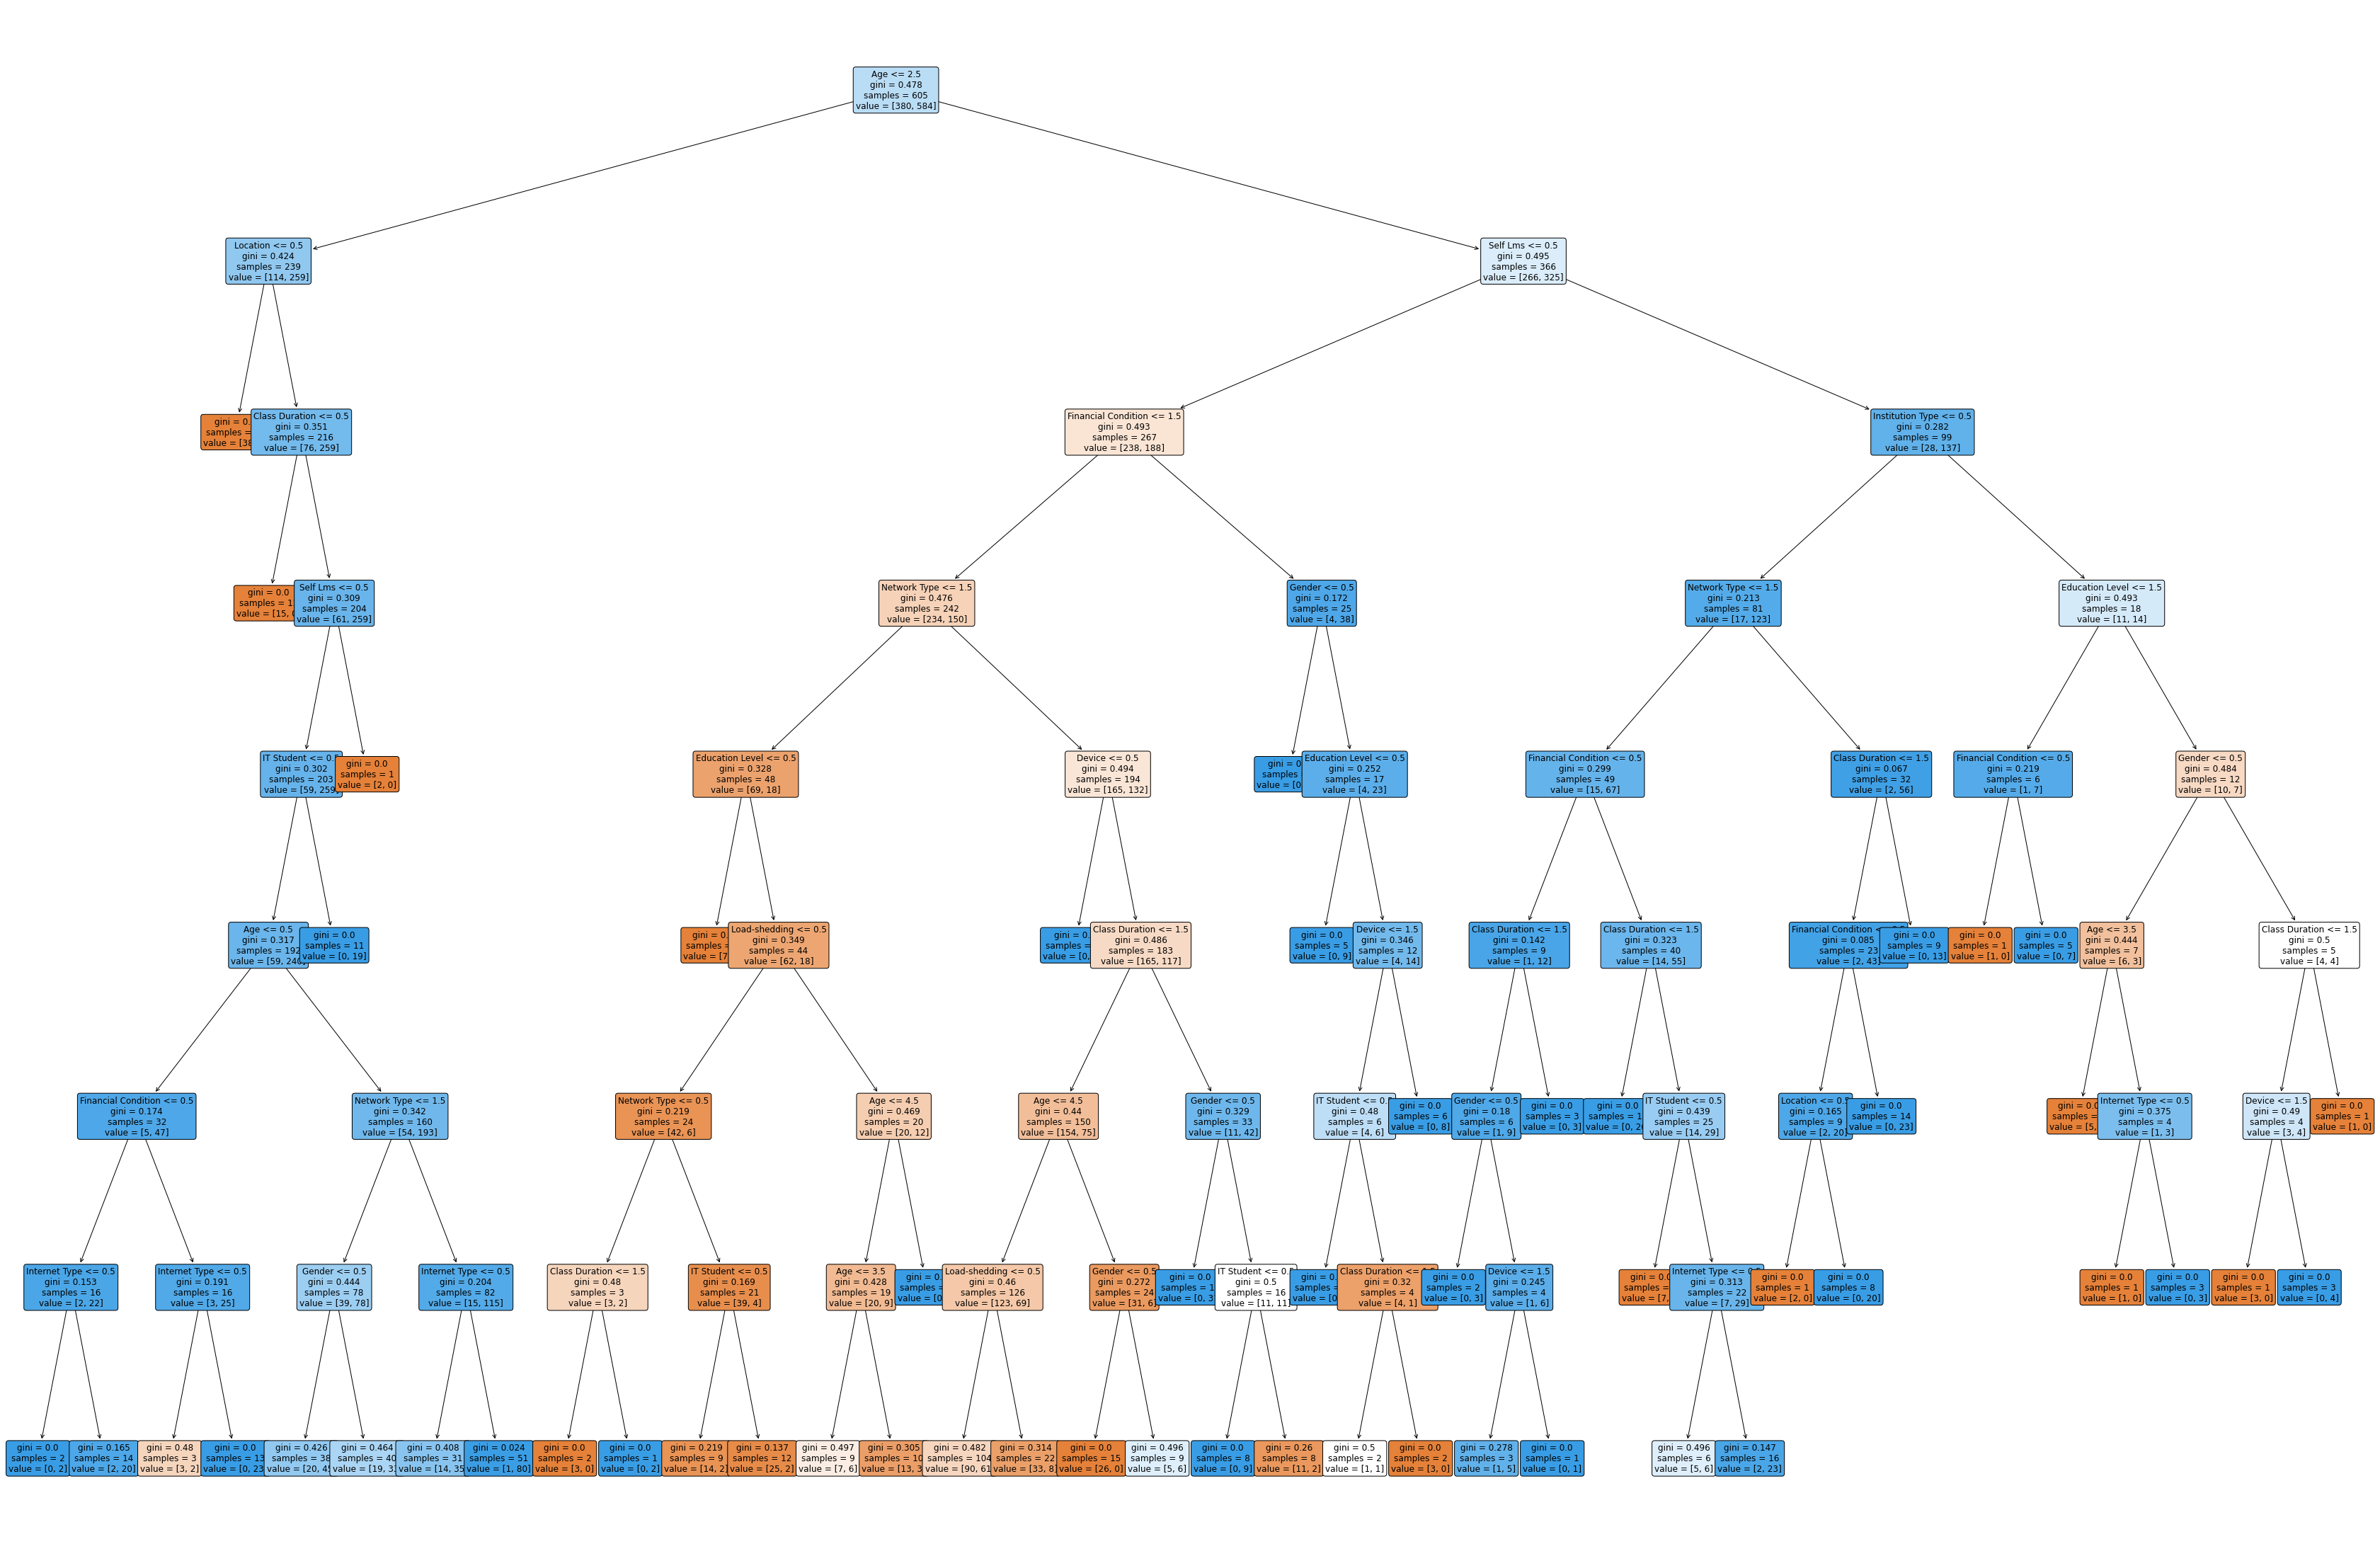

In [ ]:
plt.figure(figsize=(60, 40))
_ = tree.plot_tree(rf.estimators_[0],
                   feature_names=['Gender', 'Age',	'Education Level',	'Institution Type',	'IT Student',	
                                 'Location',	'Load-shedding',	'Financial Condition',	'Internet Type',	
                                 'Network Type',	'Class Duration',	'Self Lms',	'Device'], rounded=True, fontsize=12, filled=True)
plt.show()

Gráfico resumido

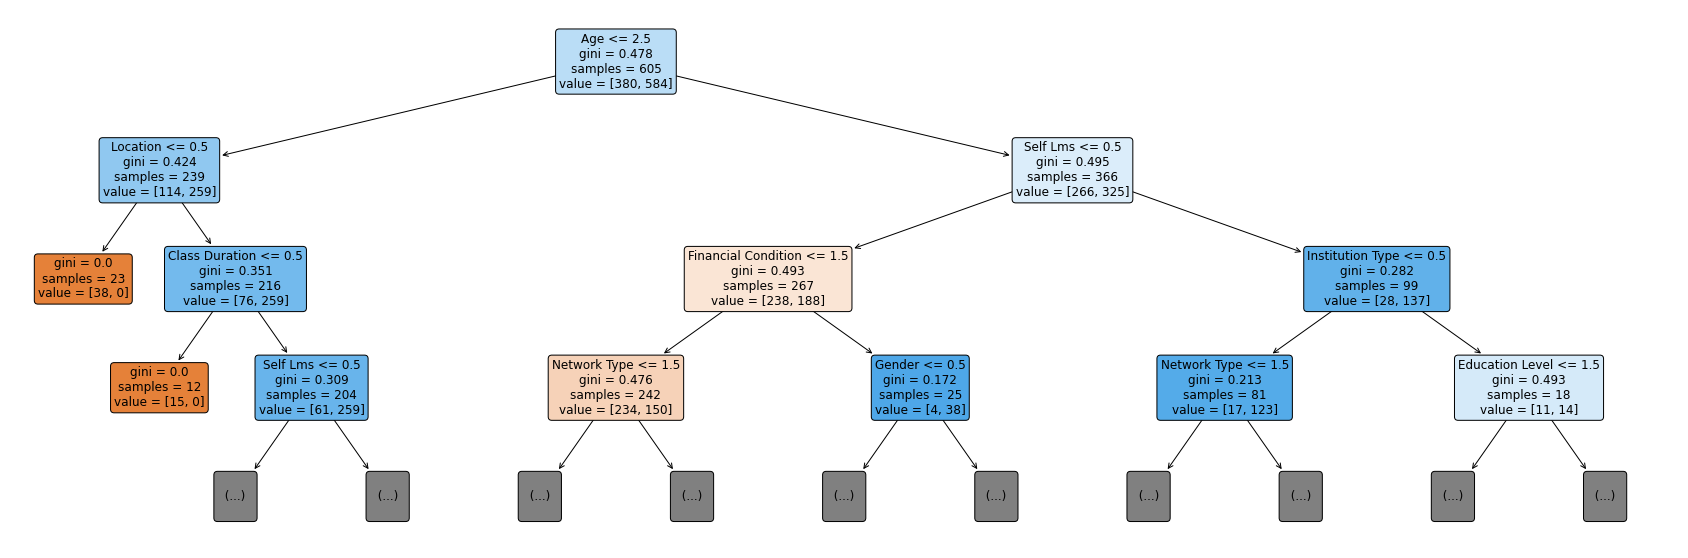

In [ ]:
plt.figure(figsize=(30, 10))
_ = tree.plot_tree(rf.estimators_[0],
                   feature_names=['Gender', 'Age',	'Education Level',	'Institution Type',	'IT Student',	
                                 'Location',	'Load-shedding',	'Financial Condition',	'Internet Type',	
                                 'Network Type',	'Class Duration',	'Self Lms',	'Device'], rounded=True, fontsize=12, filled=True, max_depth=3)
plt.show()

Gráfico para definir o melhor valor para max_depth

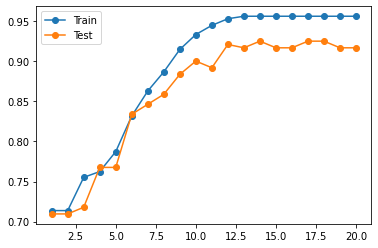

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_scores, test_scores = list(), list()
values = [i for i in range(1, 21)]
for i in values:
	model = DecisionTreeClassifier(max_depth=i)
	model.fit(X_train, y_train)
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()